# Beleg2 - Multivariate lineare Regression

### Finale Version zur Abgabe
Letzte Änderung: Diletta
<br/>Timestamp: Montag, 21.05.2018, h: 20.05


Implementieren Sie die multivariate lineare Regression mit Python und numpy in einem ipython notebook.
Hinweis: Ihre Lösung der multivariaten linearen Regression sollte auf numpy basieren und im Prinzip mit beliebig vielen Features zurechtkommen. D.h. es muss eine vektorielle Implementierung vorgenommen werden.

Benutzen Sie zur Lösung eine Kostenfunktion und das Gradientenabstiegsverfahren. Beachten Sie dabei folgende Punkte:

## Aufgabe 1: Erstellen Sie zuerst zum Testen Ihrer Lösung künstliche Datenwerte für zwei Merkmale (Features): 

#### X soll dabei eine Datenmatrix mit zwei Spalten sein, wobei die Werte zufällig aus einer Gleichverteilung (konstante Wahrscheinlichkeitsdichte in einem Intervall) gezogen werden.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
### Aufgabe 1
#Interval low-high
low = 0
high = 20
data = 100 #Anzahl der Datensätze
merkmale = 2 #Anzahl Spalten

#Creates a matrix with normal distributed values 
myX = np.random.uniform(low,high, (data,merkmale)) #Matrix mit 2 Spalten

original_X = myX.copy() #backup original matrix

#Inserts in matrix myX, at index 0, a vector of ones along axis 1
myX = np.insert(myX, 0, values=1, axis=1)
print("Matrix: ")
myX

Matrix: 


array([[  1.        ,   7.12337441,   7.51340635],
       [  1.        ,  14.60051546,   7.74584012],
       [  1.        ,  13.84078948,  14.37431695],
       [  1.        ,   2.05013904,   4.03763455],
       [  1.        ,   7.58403802,   5.12653693],
       [  1.        ,   4.91010374,  19.88157715],
       [  1.        ,  12.3997305 ,   9.94233382],
       [  1.        ,  18.47170269,   8.96182483],
       [  1.        ,   0.10066135,  13.98103355],
       [  1.        ,  11.18736655,   3.96729794],
       [  1.        ,   5.11536155,   3.08770993],
       [  1.        ,   0.72284011,  19.20107225],
       [  1.        ,   7.35805935,  12.67131214],
       [  1.        ,   0.38448187,  12.80639464],
       [  1.        ,   9.22702262,  13.9500799 ],
       [  1.        ,  18.95575676,   4.97697486],
       [  1.        ,   2.84566296,  15.55756215],
       [  1.        ,  16.37806832,   8.7636374 ],
       [  1.        ,  11.56226359,  16.43174007],
       [  1.        ,   6.99832

## Aufgabe 2: Implementieren Sie die Hypothese (lineares Modell) als Python Funktion: linear_hypothesis(theta)

#### Die Pythonfunktion soll dabei eine Funktion zurückgeben:

In [3]:
#calculates linear hypothesis
#Parameter: array of thetas

def linear_hypothesis(theta):
    return lambda X: X.dot(theta) #Function works for any given Matrix X

## Aufgabe 3: Generierung, Plotten und Feature Scaling

###  a) Nutzen Sie die Funktion linear_hypothesis(theta) zum Generieren künstlicher y-Werte (Zielwerte) für Ihre Merkmalsvektoren (Zeilen von X).  Addieren Sie zusätzich ein gaussches Rauschen auf die einzelnen y-Werte.

In [4]:
#theta array
theta = np.array([1., 1., 1.]) 

#call function linear_hypothesis
h = linear_hypothesis(theta)

#Creates y values with function linear_hypothesis
y = h(myX)

print("Y values without Gaussian error: ")
print(y) #len(y) == data

#Defining mu and sigma for gaussian error
mu = 0.0
sigma = 1.5 

#Adds a Gaussian error to the values
y = y + np.random.normal(mu, sigma, data)

print("\nY values with Gaussian error: ")
print(y)

Y values without Gaussian error: 
[ 15.63678076  23.34635558  29.21510643   7.08777358  13.71057495
  25.79168089  23.34206433  28.43352752  15.0816949   16.15466449
   9.20307148  20.92391237  21.02937148  14.19087651  24.17710252
  24.93273161  19.40322511  26.14170572  28.99400366  11.23666571
  19.4984187   24.42029837  36.72171089  18.34876816  25.37663431
  12.35155501  32.08700817  27.88112531  12.11841035  22.651523
  20.70692638  25.80837831   6.32363627  13.81453501   8.18040317
  22.80097705  23.74661617   5.32377999  33.0411696   27.64536131
  21.1635425   19.76809214  21.49312939  29.5186654   36.48835918
  18.85549776   8.60755686  18.19896742  22.68067237  17.56538396
  26.78868686  21.14968862  20.62236891   9.14541988   9.36785586
  27.72857453  28.00125633   9.10571504  16.7691121   10.70860897
  14.20107829  33.5007139   17.66370222  26.43562105  27.54437496
  25.70517633  17.13235996  16.24967796   5.02849295  15.78193982
  34.6732207   22.73598864  31.73698724  24.


### b) Stellen Sie die X1-X2-Y Werte in einem 3D Plot dar, siehe: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

Tutorial von O Really:
https://www.oreilly.com/learning/three-dimensional-plotting-in-matplotlib


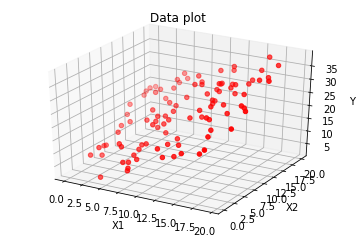

In [5]:
#Plotting    
x1 = myX[:,1]
x2 = myX[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(x1, x2, y, c='r', marker='o')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.title("Data plot")
plt.show()

### c) Implementieren Sie das Feature Scaling um neue x' Werte zu berechnen

In [6]:
#The function receives a vector of values and scales them in a range 0-1
def feature_scale(vector):
    if(np.std(vector) != 0):
        vector = (vector-np.mean(vector))/np.std(vector)
    return vector


In [7]:
#scales a matrix 
def scale_matrix(X):
    #skips first column of ones
    #for i in range(1,merkmale+1):
        #col = X[:,i]
        #X[:,i] = feature_scale(col)
    X = np.apply_along_axis(feature_scale, 0, X)
    return X

In [8]:
myX = scale_matrix(myX)
myX

array([[ 1.        , -0.44940925, -0.50567669],
       [ 1.        ,  0.93283992, -0.46542637],
       [ 1.        ,  0.79239445,  0.68242005],
       [ 1.        , -1.38726442, -1.10757247],
       [ 1.        , -0.36424944, -0.91900838],
       [ 1.        , -0.85856183,  1.63610656],
       [ 1.        ,  0.52599549, -0.08506185],
       [ 1.        ,  1.64848047, -0.25485557],
       [ 1.        , -1.74765134,  0.61431557],
       [ 1.        ,  0.30187386, -1.11975259],
       [ 1.        , -0.82061718, -1.27206993],
       [ 1.        , -1.63263331,  1.51826424],
       [ 1.        , -0.40602461,  0.38751248],
       [ 1.        , -1.69518334,  0.41090458],
       [ 1.        , -0.06052184,  0.60895536],
       [ 1.        ,  1.73796431, -0.94490789],
       [ 1.        , -1.24020122,  0.88732139],
       [ 1.        ,  1.26144425, -0.28917548],
       [ 1.        ,  0.37117857,  1.03870187],
       [ 1.        , -0.47252585, -1.24598577],
       [ 1.        ,  1.54517856, -1.705

In [21]:
myX[1].std()

0.67553547112669599

In [32]:
myX.T

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1. 

In [31]:
arr = np.array([1.,1.,0.5,0.1,-0.4,-0.9,-1])

np.ceil(arr.mean())

1.0

## Aufgabe 4: Implementieren Sie die Kostenfunktion J als Python Funktion: cost_function(x, y)
#### Die Pythonfunktion soll dabei eine Funktion zurückgeben, die die denParametervektor theta aufnimmt.
- j = cost_function(X, y) 
- print j(theta)
- 41.20 # Wert abhaengig von X und y


In [9]:
# Aufgabe 4
#given a matrix and hypothesis values (y values) calculate the cost function
def cost_function(X,y):
    m = data
    return lambda theta: 1./(2*m)*((linear_hypothesis(theta)(X)-y)**2).sum()


j = cost_function(myX,y) #y values not scaled
print(j(theta)) #theta=[1,1,1]

##### das ist die Kostenfuntkion mit skalierten y-Werten, mit theta=1,1,1 kommt 0.0 als Ergebnis raus!!!!!
#thetas = [1.2,2,4]
#jj = cost_function(myX,y_scaled)
#print(jj(thetas))

220.180818554


## Aufgabe 5: Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.

## 5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte:
theta = compute_new_theta(x, y, theta, alpha)


In [10]:
def compute_new_theta(X,y,theta,alpha):
    m = data
    new_thetas = theta-alpha*(1.0/m)*np.dot(X.T,((linear_hypothesis(theta)(X))-y))
    return new_thetas

#Test method call with alpha 0.02 or 0.1
print(compute_new_theta(myX,y,theta, 0.02))    
print(compute_new_theta(myX,y,theta, 0.1))  

[ 1.39881245  1.08473764  1.09076243]
[ 2.99406224  1.4236882   1.45381216]


## 5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. 
#Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten.
Kapseln Sie dies in eine Funktion:
gradient_descent(alpha, theta, nb_iterations, X, y)

In [11]:
def gradient_descent(alpha, theta, nb_iterations, X, y):
    #Stores costs for each iteration
    costs = [] #cost = np.zeros(nb_iterations)
       
    #stores changes in theta for each iteration
    temp_thetas = np.matrix(np.zeros(myX.shape))
    #print(temp_thetas)
    
    #starting cost value
    j = cost_function(X,y)(theta)
    
    costs.append(j)   
    
    #Iterates all nb_iterations
    for i in range(nb_iterations-1):
        #compute new thetas
        temp_thetas = compute_new_theta(X,y,theta,alpha)
        #update
        theta = temp_thetas
        #new cost function is computed   
        j = cost_function(X,y)
        cost = j(theta)
        #new cost appended
        costs.append(cost)

    return {'theta': theta, "costs": costs, "last": costs[len(costs)-1]}


In [12]:
iterations = 600
alpha = 0.01
theta = [0.,0.,0.]
gr1 = gradient_descent(alpha, theta, iterations, myX, y)
computed_theta = gr1['theta']
#print(gr1['costs'])#last cost

## 5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b

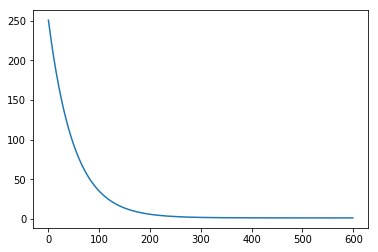

In [13]:
# Aufgabe 5c
import matplotlib.pyplot as plt
fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
plt.plot(gr1['costs'])
plt.show()

# 6) Stellen Sie die gefundene Hyperebene in einem 3D Plot zusammen mit den Daten dar

In [16]:
#Retrieves column X1 and X2 from original matrix myX
X1 =myX[:,[1,]].flatten()#selection of all rows. Of each row then the first column
X2 =myX[:,[2,]].flatten()

#Creates a meshgrid of the matrix columns X1 and X2 
X1mesh, X2mesh = np.meshgrid(X1,X2)
matrixMeshed = np.column_stack((X1mesh.ravel(),X2mesh.ravel()))
matrixMeshed = np.insert(matrixMeshed, 0, values=1, axis=1) #füge 1 als erste Spalte ein

#Values for Z calculated with linear_hypothesis on the last computed thetas (gr1 above)
yvalues = np.apply_along_axis(linear_hypothesis(computed_theta), 1, matrixMeshed) 
yvalues = yvalues.reshape(X1mesh.shape) #yvalues gets the shape of X1mesh (data,data)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

%matplotlib notebook
#ax.plot_wireframe(X1mesh, X2mesh, yvalues, rstride=4, cstride=4, alpha=0.4)
ax.plot_surface(X1mesh, X2mesh , yvalues, cmap='Oranges_r', alpha=0.01)
ax.scatter(X1,X2,y, c='r')
plt.title("3D Plot")
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')
plt.show()

ValueError: shapes (3,) and (101,) not aligned: 3 (dim 0) != 101 (dim 0)

## Test mit mehreren Features 

<IPython.core.display.Javascript object>


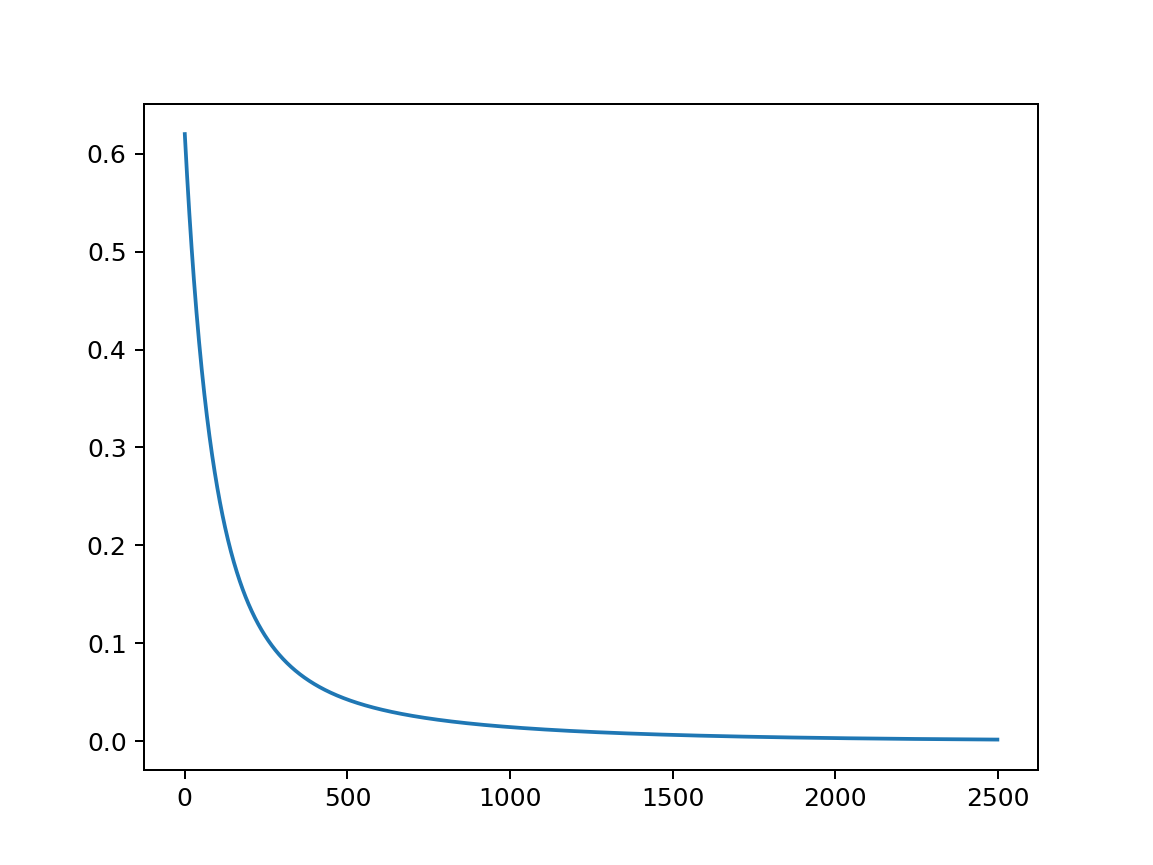

In [15]:
low = 0
high = 50
cols = 100 #features
row = 50
grossX = np.random.uniform(low,high, (row,cols))
grossX = np.insert(grossX, 0, values=1, axis=1)
#print(grossX)
thetas = np.ones(cols+1)
h = linear_hypothesis(thetas)
y_val = h(grossX)
y_val = y_val +np.random.normal(0, 1.5, row)

iterations = 2500
alpha = 0.00002
grr = gradient_descent(alpha, thetas, iterations, grossX, y_val)
computed_theta = grr['theta']

fig = plt.figure()
plt.plot(grr['costs'])
plt.show()